In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import feature_selection
import matplotlib.pyplot as plt
import ast
import operator
import math
%matplotlib inline

In [2]:
listings_df = pd.read_csv('Data/nyc_listings.csv')
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36923 entries, 0 to 36922
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            36923 non-null  int64  
 1   listing_url                                   36923 non-null  object 
 2   scrape_id                                     36923 non-null  float64
 3   last_scraped                                  36923 non-null  object 
 4   name                                          36910 non-null  object 
 5   description                                   35710 non-null  object 
 6   neighborhood_overview                         22510 non-null  object 
 7   picture_url                                   36923 non-null  object 
 8   host_id                                       36923 non-null  int64  
 9   host_url                                      36923 non-null 

In [3]:
# Removing dollar sign from price field
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
reviews_df = pd.read_csv('Data/nyc_reviews.csv')

# Convert the date to datetime
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format='%Y-%m-%d')
  
# Filter data between two dates
reviews_df = reviews_df.loc[(reviews_df['date'] >= '2019-01-01')
                     & (reviews_df['date'] < '2021-12-31')]
reviews_df.head()

<ipython-input-3-e7e5a7e10337>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")


,listing_id,id,date,reviewer_id,reviewer_name,comments
42,2595,366477703,2019-01-02,165354250,Jacob,The apartment met expectations to how it was i...
43,2595,449815873,2019-05-07,168460710,Christopher,10 / 10 would stay again
44,2595,456489109,2019-05-21,119626931,Alex,Place was so cute and comfy! Host was great an...
45,2595,487972917,2019-07-14,60181725,Andrew,I'm glad I stayed here. I liked everything.<br...
46,2595,514642186,2019-08-21,33952280,Laura,"First of all I have to say, that Jennifer is n..."


In [4]:
# Rename id to listing_id for joining tables
listings_df.rename(columns={'id':'listing_id'}, inplace=True)
# Calculating revenue based on reviews
# Idea from Jingles Airbnb Analysis

booking_df = pd.merge(reviews_df, listings_df, on='listing_id')
booking_df['calculated_revenue'] = booking_df['price'] * booking_df['minimum_nights']

revenue_listing_df = booking_df[['listing_id','calculated_revenue']].groupby(['listing_id']).sum()

listings_df = pd.merge(listings_df, revenue_listing_df, on='listing_id', how='left')
listings_df.at[listings_df['calculated_revenue'].isnull(), 'calculated_revenue'] = 0
listings_df[['listing_id','number_of_reviews','minimum_nights','price','bedrooms','beds','calculated_revenue']].sort_values('calculated_revenue',ascending=False).head(5)


,listing_id,number_of_reviews,minimum_nights,price,bedrooms,beds,calculated_revenue
21157,33621795,49,30,9999.0,1.0,1.0,14698530.0
21160,33622378,48,30,9999.0,1.0,1.0,14398560.0
17425,26496505,224,31,1800.0,1.0,1.0,8928000.0
21159,33622308,22,30,9999.0,1.0,2.0,6599340.0
15876,22985168,26,72,10000.0,1.0,1.0,5040000.0


In [5]:
pd.set_option('display.max_rows', None)
listings_df[['listing_id','price']].groupby(['price']).count().sort_values('price', ascending=False)

In [6]:
high_price_df = listings_df[listings_df['price'] >= 7000]

high_price_df[['listing_id', 'listing_url', 'accommodates', 'number_of_reviews', 'price', 'calculated_revenue']]

In [7]:
# Filter out rates greater than 7000 per night
listings_df = listings_df[listings_df['price'] < 7000]

In [8]:
listings_df[['listing_id','listing_url','number_of_reviews','minimum_nights','price','bedrooms','beds','calculated_revenue']].sort_values('calculated_revenue',ascending=False).head(5)


In [9]:
listings_df[['listing_id','minimum_nights']].groupby(['minimum_nights']).count().sort_values('minimum_nights', ascending=False)

In [10]:
# Filter out min nights greater than 500
listings_df = listings_df[listings_df['minimum_nights'] <= 500]

In [11]:
# b = pd.DataFrame()
# b['listing_id'] = listings_df['listing_id']
#
# b['Wifi'] = 0
# b['Long term stays allowed'] = 0
# b['Heating'] = 0
# b['Kitchen'] = 0
# b['Essentials'] = 0
# b['Smoke alarm'] = 0
# b['Air conditioning'] = 0
# b['Hangers'] = 0
# b['Carbon monoxide alarm'] = 0
# b['Hair dryer'] = 0
# b['Dedicated workspace'] = 0
# b['Iron'] = 0
# b['Shampoo'] = 0
# b['Hot water'] = 0
# b['TV'] = 0
# b['Dishes and silverware'] = 0
# b['Refrigerator'] = 0
# b['Cooking basics'] = 0
# b['Microwave'] = 0
# b['Fire extinguisher'] = 0
# b['Washer'] = 0
# b['Dryer'] = 0
# b['Stove'] = 0
# b['Oven'] = 0
# b['Coffee maker'] = 0
# b['Free street parking'] = 0
# b['Bed linens'] = 0
# b['First aid kit'] = 0
# b['Extra pillows and blankets'] = 0
# b['Private entrance'] = 0
# b['Lock on bedroom door'] = 0
# b['Elevator'] = 0
# b['Cable TV'] = 0
# b['TV with standard cable'] = 0
# b['Dishwasher'] = 0
# b['Luggage dropoff allowed'] = 0
# b['Security cameras on property'] = 0
# b['Bathtub'] = 0
# b['Lockbox'] = 0
# b['Host greets you'] = 0
# b['Freezer'] = 0
# b['Shower gel'] = 0
# b['Gym'] = 0
# b['Laundromat nearby'] = 0
# b['Patio or balcony'] = 0
# b['Cleaning products'] = 0
# b['Free parking on premises'] = 0
# b['Backyard'] = 0
# b['Room-darkening shades'] = 0
# b['Body soap'] = 0

In [12]:
# i = 0
# for amlist in listings_df['amenities']:
#    res = ast.literal_eval(amlist)
#    if 'Wifi' in res:
#       b.at[i, 'Wifi'] = 1
#    if 'Long term stays allowed' in res:
#       b.at[i, 'Long term stays allowed'] = 1
#    if 'Heating' in res:
#       b.at[i, 'Heating'] = 1
#    if 'Kitchen' in res:
#       b.at[i, 'Kitchen'] = 1
#    if 'Essentials' in res:
#       b.at[i, 'Essentials'] = 1
#    if 'Smoke alarm' in res:
#       b.at[i, 'Smoke alarm'] = 1
#    if 'Air conditioning' in res:
#       b.at[i, 'Air conditioning'] = 1
#    if 'Hangers' in res:
#       b.at[i, 'Hangers'] = 1
#    if 'Carbon monoxide alarm' in res:
#       b.at[i, 'Carbon monoxide alarm'] = 1
#    if 'Hair dryer' in res:
#       b.at[i, 'Hair dryer'] = 1
#    if 'Dedicated workspace' in res:
#       b.at[i, 'Dedicated workspace'] = 1
#    if 'Iron' in res:
#       b.at[i, 'Iron'] = 1
#    if 'Shampoo' in res:
#       b.at[i, 'Shampoo'] = 1
#    if 'Hot water' in res:
#       b.at[i, 'Hot water'] = 1
#    if 'TV' in res:
#       b.at[i, 'TV'] = 1
#    if 'Dishes and silverware' in res:
#       b.at[i, 'Dishes and silverware'] = 1
#    if 'Refrigerator' in res:
#       b.at[i, 'Refrigerator'] = 1
#    if 'Cooking basics' in res:
#       b.at[i, 'Cooking basics'] = 1
#    if 'Microwave' in res:
#       b.at[i, 'Microwave'] = 1
#    if 'Fire extinguisher' in res:
#       b.at[i, 'Fire extinguisher'] = 1
#    if 'Washer' in res:
#       b.at[i, 'Washer'] = 1
#    if 'Dryer' in res:
#       b.at[i, 'Dryer'] = 1
#    if 'Stove' in res:
#       b.at[i, 'Stove'] = 1
#    if 'Oven' in res:
#       b.at[i, 'Oven'] = 1
#    if 'Coffee maker' in res:
#       b.at[i, 'Coffee maker'] = 1
#    if 'Free street parking' in res:
#       b.at[i, 'Free street parking'] = 1
#    if 'Bed linens' in res:
#       b.at[i, 'Bed linens'] = 1
#    if 'First aid kit' in res:
#       b.at[i, 'First aid kit'] = 1
#    if 'Extra pillows and blankets' in res:
#       b.at[i, 'Extra pillows and blankets'] = 1
#    if 'Private entrance' in res:
#       b.at[i, 'Private entrance'] = 1
#    if 'Lock on bedroom door' in res:
#       b.at[i, 'Lock on bedroom door'] = 1
#    if 'Elevator' in res:
#       b.at[i, 'Elevator'] = 1
#    if 'Cable TV' in res:
#       b.at[i, 'Cable TV'] = 1
#    if 'TV with standard cable' in res:
#       b.at[i, 'TV with standard cable'] = 1
#    if 'Dishwasher' in res:
#       b.at[i, 'Dishwasher'] = 1
#    if 'Luggage dropoff allowed' in res:
#       b.at[i, 'Luggage dropoff allowed'] = 1
#    if 'Security cameras on property' in res:
#       b.at[i, 'Security cameras on property'] = 1
#    if 'Bathtub' in res:
#       b.at[i, 'Bathtub'] = 1
#    if 'Lockbox' in res:
#       b.at[i, 'Lockbox'] = 1
#    if 'Host greets you' in res:
#       b.at[i, 'Host greets you'] = 1
#    if 'Freezer' in res:
#       b.at[i, 'Freezer'] = 1
#    if 'Shower gel' in res:
#       b.at[i, 'Shower gel'] = 1
#    if 'Gym' in res:
#       b.at[i, 'Gym'] = 1
#    if 'Laundromat nearby' in res:
#       b.at[i, 'Laundromat nearby'] = 1
#    if 'Patio or balcony' in res:
#       b.at[i, 'Patio or balcony'] = 1
#    if 'Cleaning products' in res:
#       b.at[i, 'Cleaning products'] = 1
#    if 'Free parking on premises' in res:
#       b.at[i, 'Free parking on premises'] = 1
#    if 'Backyard' in res:
#       b.at[i, 'Backyard'] = 1
#    if 'Room-darkening shades' in res:
#       b.at[i, 'Room-darkening shades'] = 1
#    if 'Body soap' in res:
#       b.at[i, 'Body soap'] = 1
#    i += 1

# b = b.fillna(0)

# listings_df = pd.merge(listings_df, b, on='listing_id')

In [13]:
# Remove irrelevant features and those with too much missingness
listings_df.drop(['listing_id'], axis = 1, inplace = True)
listings_df.drop(['host_id'], axis = 1, inplace = True)
listings_df.drop(['listing_url'], axis = 1, inplace = True)
listings_df.drop(['scrape_id'], axis = 1, inplace = True)
listings_df.drop(['last_scraped'], axis = 1, inplace = True)
listings_df.drop(['name'], axis = 1, inplace = True)
listings_df.drop(['description'], axis = 1, inplace = True) # don't have the resources/time/knowledge to extract anything from this
listings_df.drop(['neighborhood_overview'], axis = 1, inplace = True)
listings_df.drop(['picture_url'], axis = 1, inplace = True)
listings_df.drop(['host_url'], axis = 1, inplace = True)
listings_df.drop(['host_name'], axis = 1, inplace = True)
listings_df.drop(['host_since'], axis = 1, inplace = True)
listings_df.drop(['host_location'], axis = 1, inplace = True)
listings_df.drop(['host_about'], axis = 1, inplace = True)
listings_df.drop(['host_response_time'], axis = 1, inplace = True)
listings_df.drop(['host_response_rate'], axis = 1, inplace = True)
listings_df.drop(['host_acceptance_rate'], axis = 1, inplace = True)
listings_df.drop(['host_thumbnail_url'], axis = 1, inplace = True)
listings_df.drop(['host_picture_url'], axis = 1, inplace = True)
listings_df.drop(['host_neighbourhood'], axis = 1, inplace = True)
listings_df.drop(['neighbourhood'], axis = 1, inplace = True)
listings_df.drop(['latitude'], axis = 1, inplace = True)
listings_df.drop(['longitude'], axis = 1, inplace = True)
listings_df.drop(['bathrooms'], axis = 1, inplace = True) # entire column missing
listings_df.drop(['minimum_minimum_nights'], axis = 1, inplace = True)
listings_df.drop(['maximum_minimum_nights'], axis = 1, inplace = True)
listings_df.drop(['minimum_maximum_nights'], axis = 1, inplace = True)
listings_df.drop(['maximum_maximum_nights'], axis = 1, inplace = True)
listings_df.drop(['calendar_updated'], axis = 1, inplace = True) # entire column missing
listings_df.drop(['calendar_last_scraped'], axis = 1, inplace = True)
listings_df.drop(['first_review'], axis = 1, inplace = True)
listings_df.drop(['last_review'], axis = 1, inplace = True)
listings_df.drop(['review_scores_rating'], axis = 1, inplace = True)
listings_df.drop(['review_scores_accuracy'], axis = 1, inplace = True)
listings_df.drop(['review_scores_cleanliness'], axis = 1, inplace = True)
listings_df.drop(['review_scores_checkin'], axis = 1, inplace = True)
listings_df.drop(['review_scores_communication'], axis = 1, inplace = True)
listings_df.drop(['review_scores_location'], axis = 1, inplace = True)
listings_df.drop(['review_scores_value'], axis = 1, inplace = True)
listings_df.drop(['reviews_per_month'], axis = 1, inplace = True)
listings_df.drop(['license'], axis = 1, inplace = True) # entire column missing
listings_df.drop(['host_verifications'], axis = 1, inplace = True)

# Amenities are parsed and hot deck encoded above
listings_df.drop(['amenities'], axis = 1, inplace = True)

In [14]:
listings_df['has_availability'] = listings_df['has_availability'].map({'t' : 1, 'f' : 0})
listings_df['instant_bookable'] = listings_df['instant_bookable'].map({'t' : 1, 'f' : 0})
listings_df['host_is_superhost'] = listings_df['host_is_superhost'].map({'t' : 1, 'f' : 0})

listings_df['host_has_profile_pic'] = listings_df['host_has_profile_pic'].map({'t' : 1, 'f' : 0})
listings_df['host_identity_verified'] = listings_df['host_identity_verified'].map({'t' : 1, 'f' : 0})

listings_df['bathrooms_text'] = pd.Categorical(listings_df['bathrooms_text'])
listings_df['bathrooms_text'] = listings_df['bathrooms_text'].cat.codes

listings_df['neighbourhood_cleansed'] = pd.Categorical(listings_df['neighbourhood_cleansed'])
listings_df['neighbourhood_cleansed'] = listings_df['neighbourhood_cleansed'].cat.codes

listings_df['neighbourhood_group_cleansed'] = pd.Categorical(listings_df['neighbourhood_group_cleansed'])
listings_df['neighbourhood_group_cleansed'] = listings_df['neighbourhood_group_cleansed'].cat.codes

listings_df['property_type'] = pd.Categorical(listings_df['property_type'])
listings_df['property_type'] = listings_df['property_type'].cat.codes

listings_df['room_type'] = pd.Categorical(listings_df['room_type'])
listings_df['room_type'] = listings_df['room_type'].cat.codes

In [15]:
# Fill null/na values
# interpolate vs ffill
listings_df['minimum_nights_avg_ntm'].interpolate(method ='linear', limit_direction ='forward')
listings_df['maximum_nights_avg_ntm'].interpolate(method ='linear', limit_direction ='forward')

# Assuming one bed per bedroom to fill in missing stuff in bedrooms column
listings_df['bedrooms'].fillna(listings_df['beds'], inplace=True)

# Drop any other rows with missing values
listings_df.dropna(inplace = True)

# Drop revenues of zero
listings_df = listings_df[listings_df['calculated_revenue'] > 0]

In [47]:
listings_df.shape

X = listings_df.drop(['calculated_revenue'], axis = 1)
y = listings_df['calculated_revenue']

In [46]:
# # KBest Feature Selection test on XGBoost

# import xgboost
# X = listings_df.drop(['calculated_revenue'], axis = 1)
# y = listings_df['calculated_revenue']

# X = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=11).fit_transform(X,y)
# X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# # Specifying the model to use
# xg = xgboost.XGBRegressor(eval_metric='mape')
# xg.fit(X_train, y_train)
# xgpredicted = xg.predict(X_test)
# xgpredicted[xgpredicted < 0] = 0

# from sklearn.model_selection import cross_val_score

# xg_reg_mae = cross_val_score(xg, X, y, cv=10,scoring='neg_mean_absolute_error')
# xg_reg_rmse = cross_val_score(xg, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

# print("XGBoost Regressor")
# print("Mean Absolute Error = {}".format(np.mean(xg_reg_mae)*-1))
# print("Mean Absolute Percentage Error = {}".format(np.mean(xg_reg_rmse)*-1))

XGBoost Regressor
Mean Absolute Error = 16024.348558131835
Mean Absolute Percentage Error = 1.39804019423933


In [18]:
listings_df.corr()
plt.rcParams['figure.figsize'] = [25, 30]
sns.heatmap(listings_df.corr(), vmin=listings_df.corr().values.min(), vmax=1, cmap="YlGnBu", square=True, 
        linewidths=0.1, annot=True, annot_kws={"size":8})  

In [48]:
import xgboost
import lightgbm as lgb 
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# Split data into 90/10 Train/Test ratio
print("---------- Splitting Data 9:1 Train:Test-----------------")
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.1)

# Specifying the model to use
xg = xgboost.XGBRegressor(eval_metric='mape')
cb = CatBoostRegressor()
lg = lgb.LGBMRegressor()

lr = LinearRegression()
nb = GaussianNB()
dt = DecisionTreeRegressor()
sv = SVR()

---------- Splitting Data 9:1 Train:Test-----------------


In [49]:
# Model fitting i.e., creating the model
print("------------------- Fitting Model ----------------------")
xg.fit(X_train, y_train)
cb.fit(X_train, y_train)
lg.fit(X_train, y_train)

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)
dt.fit(X_train, y_train)
sv.fit(X_train, y_train)

------------------- Fitting Model ----------------------
Learning rate set to 0.064943
0:	learn: 97208.4702804	total: 3.11ms	remaining: 3.11s
1:	learn: 95778.4457799	total: 5.88ms	remaining: 2.93s
2:	learn: 94348.3239551	total: 8.83ms	remaining: 2.93s
3:	learn: 92887.2315017	total: 11.4ms	remaining: 2.84s
4:	learn: 91609.4023839	total: 14.7ms	remaining: 2.92s
5:	learn: 90375.9203017	total: 17.4ms	remaining: 2.88s
6:	learn: 88335.5854916	total: 20.3ms	remaining: 2.88s
7:	learn: 86534.7734460	total: 23.3ms	remaining: 2.89s
8:	learn: 85607.6911154	total: 28.5ms	remaining: 3.14s
9:	learn: 83894.1034858	total: 31.4ms	remaining: 3.1s
10:	learn: 82796.8330411	total: 34.7ms	remaining: 3.12s
11:	learn: 82047.4563996	total: 37.4ms	remaining: 3.08s
12:	learn: 81022.9795397	total: 40.5ms	remaining: 3.07s
13:	learn: 80095.3683420	total: 43ms	remaining: 3.03s
14:	learn: 78469.8605886	total: 45.7ms	remaining: 3s
15:	learn: 77389.5737036	total: 48.3ms	remaining: 2.97s
16:	learn: 76640.1137732	total: 5

SVR()

In [50]:
# Make predictions
print("------------------ Making Predictions ------------------")
expected = y_test

xgpredicted = xg.predict(X_test)
cbpredicted = cb.predict(X_test)
lgpredicted = lg.predict(X_test)

lrpredicted = lr.predict(X_test)
nbpredicted = nb.predict(X_test)
dtpredicted = dt.predict(X_test)
svpredicted = sv.predict(X_test)

------------------ Making Predictions ------------------


In [51]:
xgpredicted[xgpredicted < 0] = 0
cbpredicted[cbpredicted < 0] = 0
lgpredicted[lgpredicted < 0] = 0

lrpredicted[lrpredicted < 0] = 0
nbpredicted[nbpredicted < 0] = 0
dtpredicted[dtpredicted < 0] = 0
svpredicted[svpredicted < 0] = 0

In [23]:
# Print performance metrics
print("Model: XGBoost")
print(xg)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, xgpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, xgpredicted))))
print('\n')

print("Model: CatBoost")
print(cb)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, cbpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, cbpredicted))))
print('\n')

print("Model: LightGBM")
print(lg)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, lgpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, lgpredicted))))
print('\n')

print("Model: LinReg")
print(lr)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, lrpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, lrpredicted))))
print('\n')

print("Model: Naive Bayes")
print(nb)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, nbpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, nbpredicted))))
print('\n')

print("Model: Decision Tree")
print(dt)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, dtpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, dtpredicted))))
print('\n')

print("Model: SVM")
print(sv)
print('MAE: ' + str(metrics.mean_absolute_error(y_test, svpredicted)))
print('MAPE: ' + str(math.sqrt(metrics.mean_absolute_percentage_error(y_test, svpredicted))))
print('\n')

Model: XGBoost
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eval_metric='rmse',
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
MAE: 12884.384406746243
MAPE: 1.0398123750002541


Model: CatBoost
MAE: 12527.056261013107
MAPE: 0.9612627532054213


Model: LightGBM
LGBMRegressor()
MAE: 13344.538389486093
MAPE: 1.070207036009987


Model: LogReg
LinearRegression()
MAE: 23912.721783651614
MAPE: 1.731920528715538


Model: Naive Bayes
GaussianNB()
MAE: 19462.962621359224
MAPE: 1.338431431432807


Model: Decisi

In [52]:
from sklearn.model_selection import cross_val_score

xg_reg_mae = cross_val_score(xg, X, y, cv=10,scoring='neg_mean_absolute_error')
xg_reg_rmse = cross_val_score(xg, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("XGBoost Regressor")
print("Mean Absolute Error = {}".format(np.mean(xg_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(xg_reg_rmse)*-1))

cb_reg_mae = cross_val_score(cb, X, y, cv=10,scoring='neg_mean_absolute_error')
cb_reg_rmse = cross_val_score(cb, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nCatBoost Regressor")
print("Mean Absolute Error = {}".format(np.mean(cb_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(cb_reg_rmse)*-1))


lg_reg_mae = cross_val_score(lg, X, y, cv=10,scoring='neg_mean_absolute_error')
lg_reg_rmse = cross_val_score(lg, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nLightGBM Regressor")
print("Mean Absolute Error = {}".format(np.mean(lg_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(lg_reg_rmse)*-1))

lr_reg_mae = cross_val_score(lr, X, y, cv=10,scoring='neg_mean_absolute_error')
lr_reg_rmse = cross_val_score(lr, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nLinear Regressor")
print("Mean Absolute Error = {}".format(np.mean(lr_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(lr_reg_rmse)*-1))

nb_reg_mae = cross_val_score(nb, X, y, cv=10,scoring='neg_mean_absolute_error')
nb_reg_rmse = cross_val_score(nb, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nNaive Bayes Regressor")
print("Mean Absolute Error = {}".format(np.mean(nb_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(nb_reg_rmse)*-1))

dt_reg_mae = cross_val_score(dt, X, y, cv=10,scoring='neg_mean_absolute_error')
dt_reg_rmse = cross_val_score(dt, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nDecision Tree Regressor")
print("Mean Absolute Error = {}".format(np.mean(dt_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(dt_reg_rmse)*-1))

sv_reg_mae = cross_val_score(sv, X, y, cv=10,scoring='neg_mean_absolute_error')
sv_reg_rmse = cross_val_score(sv, X, y, cv=10,scoring='neg_mean_absolute_percentage_error')

print("\nSVM Regressor")
print("Mean Absolute Error = {}".format(np.mean(sv_reg_mae)*-1))
print("Mean Absolute Percentage Error = {}".format(np.mean(sv_reg_rmse)*-1))


# Latest run results (12/11/2021):

# XGBoost Regressor
# Mean Absolute Error = 14902.110080716859
# Mean Absolute Percentage Error = 1.6023081726915318

# CatBoost Regressor
# Mean Absolute Error = 13972.93044822585
# Mean Absolute Percentage Error = 1.1835342076432054

# LightGBM Regressor
# Mean Absolute Error = 15119.178272410409
# Mean Absolute Percentage Error = 2.242189803561159

# Naive Bayes Regressor
# Mean Absolute Error = 25186.611076990906
# Mean Absolute Percentage Error = 2.4381818399073247

# Decision Tree Regressor
# Mean Absolute Error = 16912.628338480834
# Mean Absolute Percentage Error = 0.9368763870324127

# SVM Regressor
# Mean Absolute Error = 24423.217896518207
# Mean Absolute Percentage Error = 4.350827790997944

XGBoost Regressor
Mean Absolute Error = 14902.110080716859
Mean Absolute Percentage Error = 1.6023081726915318
Learning rate set to 0.064943
0:	learn: 101059.0839035	total: 2.93ms	remaining: 2.92s
1:	learn: 98671.1973962	total: 5.66ms	remaining: 2.82s
2:	learn: 97308.2391343	total: 8.24ms	remaining: 2.74s
3:	learn: 94898.7469840	total: 10.9ms	remaining: 2.71s
4:	learn: 93485.4270726	total: 13.6ms	remaining: 2.7s
5:	learn: 92090.4287268	total: 16.4ms	remaining: 2.72s
6:	learn: 89940.4234082	total: 19.1ms	remaining: 2.71s
7:	learn: 88836.7803472	total: 21.6ms	remaining: 2.68s
8:	learn: 87717.4211424	total: 24.2ms	remaining: 2.66s
9:	learn: 85931.0072055	total: 26.8ms	remaining: 2.65s
10:	learn: 84971.6664609	total: 29.4ms	remaining: 2.64s
11:	learn: 84025.0683683	total: 32ms	remaining: 2.63s
12:	learn: 83105.4261770	total: 34.5ms	remaining: 2.62s
13:	learn: 82307.2441987	total: 37.2ms	remaining: 2.62s
14:	learn: 80475.1475317	total: 40ms	remaining: 2.62s
15:	learn: 78847.5602696	total: 4

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"



Naive Bayes Regressor
Mean Absolute Error = 25186.611076990906
Mean Absolute Percentage Error = 2.4381818399073247

Decision Tree Regressor
Mean Absolute Error = 17199.31910313236
Mean Absolute Percentage Error = 0.8261949540654229

SVM Regressor
Mean Absolute Error = 24423.217896518207
Mean Absolute Percentage Error = 4.350827790997944


In [25]:
from sklearn import tree

[Text(308.3329444081275, 214.6523076923077, 'X[6] <= 165.0\nmse = 11001274907.519\nsamples = 18537\nvalue = 27352.034'),
 Text(282.2313989732986, 209.07692307692307, 'X[9] <= 494542.5\nmse = 8707273306.149\nsamples = 18495\nvalue = 26184.154'),
 Text(230.91016883874957, 203.50153846153847, 'X[8] <= 39.5\nmse = 4303533387.264\nsamples = 18478\nvalue = 25524.744'),
 Text(153.30466927180163, 197.92615384615385, 'X[6] <= 14.5\nmse = 967200277.72\nsamples = 13327\nvalue = 13950.983'),
 Text(101.0802391744063, 192.35076923076923, 'X[5] <= 337.5\nmse = 71007843.235\nsamples = 6299\nvalue = 4801.786'),
 Text(76.15218396634492, 186.7753846153846, 'X[8] <= 14.5\nmse = 29070401.808\nsamples = 5635\nvalue = 3643.593'),
 Text(51.19182947941773, 181.2, 'X[6] <= 3.5\nmse = 7701455.96\nsamples = 3775\nvalue = 1970.72'),
 Text(33.22978005461954, 175.6246153846154, 'X[8] <= 7.5\nmse = 2204185.983\nsamples = 2638\nvalue = 1275.952'),
 Text(20.556607004646718, 170.04923076923077, 'X[8] <= 3.5\nmse = 69305

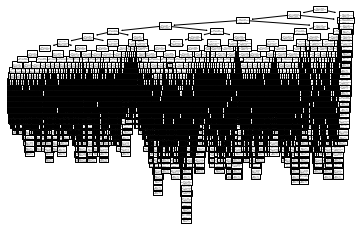

In [26]:
tree.plot_tree(dt)

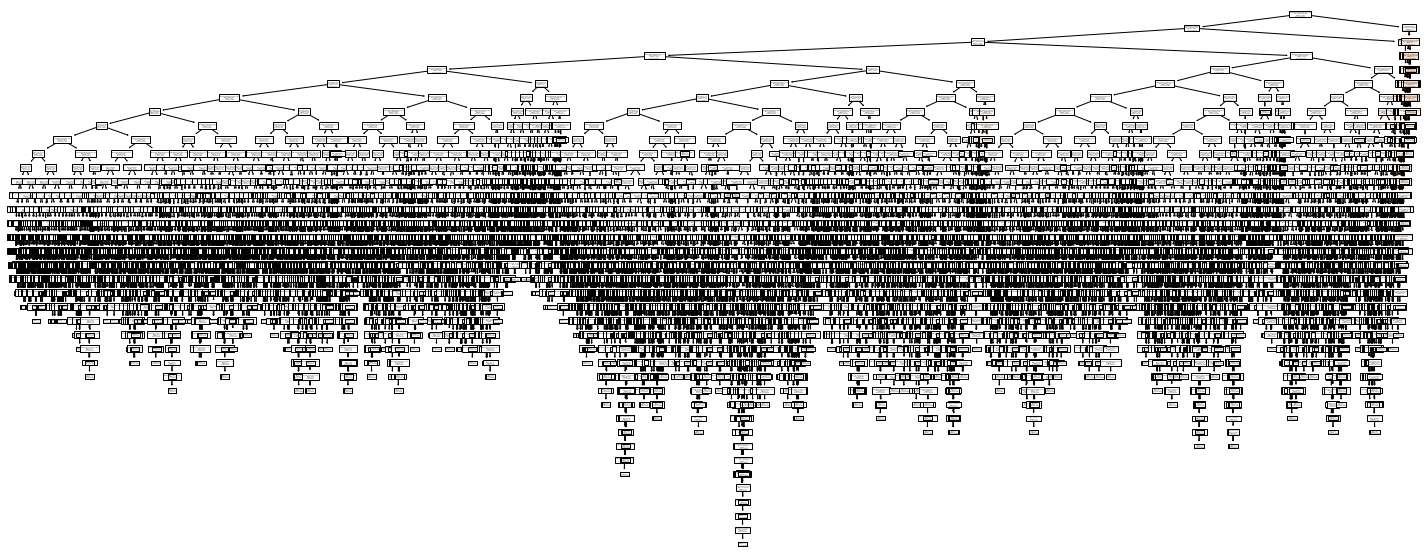

In [28]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(dt, 
                   feature_names=listings_df.columns,  
                   class_names='calculated_revenue',
                   filled=True)

In [ ]:
text = tree.export_text(dt)
print(text)

|--- feature_31 <= 493950.00
|   |--- feature_14 <= 165.00
|   |   |--- feature_23 <= 39.50
|   |   |   |--- feature_14 <= 14.50
|   |   |   |   |--- feature_13 <= 338.50
|   |   |   |   |   |--- feature_23 <= 14.50
|   |   |   |   |   |   |--- feature_14 <= 3.50
|   |   |   |   |   |   |   |--- feature_23 <= 7.50
|   |   |   |   |   |   |   |   |--- feature_23 <= 3.50
|   |   |   |   |   |   |   |   |   |--- feature_13 <= 179.50
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 14
|   |   |   |   |   |   |   |   |   |--- feature_13 >  179.50
|   |   |   |   |   |   |   |   |   |   |--- feature_14 <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 10
|   |   |   |   |   |   |   |   |   |   |--- feature_14 >  1.50
|   |   |   | 

In [ ]:
import graphviz

data = tree.export_graphviz(dt,
                            out_file=None,
                            feature_names=X.columns,
                            filled=True)

graphviz.Source(data, format="png")